## Exploring Coral Reef Dataset
For today's exercise we are going to be walking through a simple workflow for an environmental dataset looking at coral reef data in the Indian Ocean.

### About the Data
For this task we are going to use data about Western Indian Ocean Coral Diversity (McClanahan, 2023) from the Knowledge Network for Biocomplexity (KNB) data repository.

*You will need to go to the webpage and download the data yourself!*

This dataset looks at the current coral reef patterns can coral taxa in the Western Indian Ocean, and uses a machine learning program to predict the state of coral reefs in 2050. They did this by looking at the impact of climate change, water quality, direct human-resource extraction, and variable selection processes on numbers of coral taxa.

Tim McClanahan. (2023). Western Indian Ocean Coral Diversity. Knowledge Network for Biocomplexity. Date Accessed: 25 January 2026. https://knb.ecoinformatics.org/view/doi%3A10.5063%2FF1K35S3H

### Part 1: Setup

As a class we will have already:
- Created a Github Account
- Connected our Github to VS Code
- Forked and cloned the class repository
- Opened this Repository in VS Code

After downloading the data, you will need to set up your environment!
- Select Python Environments
- Select base

Now we need to load in the relevant packages:


In [1]:
#Pandas is good for working with datasets
import pandas as pd
#Numpy is good for simple analysis
import numpy as np
#Matplotlib is good for plotting
import matplotlib.pyplot as plt

### Read in the Data
Hint: right click on the file to copy the relative file path

In [2]:
#Create a dataframe with the coral data:
coral_data = pd.read_csv("data/Week4/WesternIndianOceanCoralDiversity.csv")

### Intro to Data Exploration

In [3]:
#head shows the first x number of rows of a dataset
coral_data.head(10)

,PU_ID,PU_Lat,PU_Lon,Number_of_genera,Country,Ecoregion,Management,Habitat,Observer,Depth,...,SST_bimodality,SST_Skewness,ClimateStressModel,Netflow,Indegree,Outdegree,Retention,min_yr,max_yr,no_replicates
0,7,39.076711,-5.490011,35,Tanzania,East African Coral Coast,UnfishedLow,Crest,Tim,11.0,...,0.462556,-0.128136,0.596375,0.144498,98.25,74.75,14.00,2019,2019,1
1,7,39.076711,-5.490011,22,Tanzania,East African Coral Coast,UnfishedLow,Lagoon/Back reef,Nyawira,2.0,...,0.462556,-0.128136,0.596375,0.144498,98.25,74.75,14.00,2010,2015,2
2,7,39.076711,-5.490011,25,Tanzania,East African Coral Coast,UnfishedLow,Slope,Nyawira,4.0,...,0.462556,-0.128136,0.596375,0.144498,98.25,74.75,14.00,2015,2015,1
3,7,39.076711,-5.490011,26,Tanzania,East African Coral Coast,UnfishedLow,Slope,Nyawira,3.0,...,0.462556,-0.128136,0.596375,0.144498,98.25,74.75,14.00,2016,2019,2
4,10,39.054253,-5.512514,27,Tanzania,East African Coral Coast,UnfishedLow,Lagoon/Back reef,Nyawira,1.5,...,0.461297,-0.134548,0.629000,0.011721,112.75,51.50,183.75,2010,2019,3
5,10,39.054253,-5.512514,29,Tanzania,East African Coral Coast,UnfishedLow,Lagoon/Back reef,Tim,1.5,...,0.461297,-0.134548,0.629000,0.011721,112.75,51.50,183.75,2015,2015,1
6,15,39.054253,-5.535017,19,Tanzania,East African Coral Coast,Restricted,Crest,Tim,8.0,...,0.461297,-0.134548,0.595600,0.011721,112.75,51.50,183.75,2019,2019,1
7,39,39.009337,-5.647518,28,Tanzania,East African Coral Coast,UnfishedLow,Lagoon/Back reef,Nyawira,3.0,...,0.464874,-0.158601,0.626000,-0.063087,96.50,40.75,35.75,2015,2019,3
8,39,39.009337,-5.647518,30,Tanzania,East African Coral Coast,UnfishedLow,Slope,Nyawira,6.5,...,0.464874,-0.158601,0.626000,-0.063087,96.50,40.75,35.75,2010,2015,2
9,39,39.009337,-5.647518,30,Tanzania,East African Coral Coast,UnfishedLow,Slope,Nyawira,4.5,...,0.464874,-0.158601,0.626000,-0.063087,96.50,40.75,35.75,2010,2019,4


In [4]:
#dtypes tells me the datatype of each column of data
coral_data.dtypes

PU_ID                    int64
PU_Lat                 float64
PU_Lon                 float64
Number_of_genera         int64
Country                 object
Ecoregion               object
Management              object
Habitat                 object
Observer                object
Depth                  float64
Coralcover               int64
SSTRateofRise          float64
PARmax                 float64
Calcite                float64
Dis_oxygen             float64
mean.waveNRJ           float64
Salinity_mean          float64
andrello_reef_value      int64
andrello_nutrients     float64
mean.npp               float64
TT_market_hrs          float64
TT_pop_hrs             float64
cumDHW                 float64
SST_Kurtosis           float64
SST_Median             float64
ChlorA_median          float64
andrello_sediments     float64
Current_vel_mean       float64
Diff_attenuation       float64
Grav_NP                float64
Grav_NC                float64
PH                     float64
SST_bimo

### Intro to Data Cleaning

In [5]:
#Let's select only the data we are interested in
selected_coral_columns = ["Number_of_genera","PH","Habitat","Depth","mean.npp"]

selected_coral_data = coral_data[selected_coral_columns]
selected_coral_data

,Number_of_genera,PH,Habitat,Depth,mean.npp
0,35,8.2175,Crest,11.00,1139.112671
1,22,8.2175,Lagoon/Back reef,2.00,1139.112671
2,25,8.2175,Slope,4.00,1139.112671
3,26,8.2175,Slope,3.00,1139.112671
4,27,8.2180,Lagoon/Back reef,1.50,1126.355957
...,...,...,...,...,...
570,19,8.2400,Slope,15.50,1054.313965
571,18,8.2400,Slope,12.00,1054.313965
572,19,8.2400,Slope,12.60,1054.313965
573,19,8.2400,Slope,13.00,1054.313965


In [6]:
# Do we have high quality data? Are there missing values?
missing_data_rows = selected_coral_data[selected_coral_data.isna().any(axis=1)]
missing_data_rows

,Number_of_genera,PH,Habitat,Depth,mean.npp
50,25,8.21050,NaN,1.000000,992.653503
53,11,8.24300,NaN,2.000000,1193.751099
54,11,8.24300,NaN,8.000000,1193.751099
55,18,8.24300,NaN,15.000000,1193.751099
61,19,8.21400,NaN,4.000000,1056.633057
62,18,8.21400,NaN,2.000000,1056.633057
74,18,8.21000,NaN,4.000000,1000.519043
90,24,8.20800,NaN,12.000000,1332.088501
91,30,8.20800,NaN,12.000000,1332.088501
92,28,8.20800,NaN,11.000000,1332.088501


In [7]:
# Not enough habitat data
selected_coral_columns = ["Number_of_genera","PH","Depth","mean.npp"]
# Update our data
selected_coral_data = coral_data[selected_coral_columns]
#df = df.rename(columns={"old_name": "new_name"})
selected_coral_data = selected_coral_data.rename(columns={"mean.npp": "Net_primary_prod"})
selected_coral_data

,Number_of_genera,PH,Depth,Net_primary_prod
0,35,8.2175,11.00,1139.112671
1,22,8.2175,2.00,1139.112671
2,25,8.2175,4.00,1139.112671
3,26,8.2175,3.00,1139.112671
4,27,8.2180,1.50,1126.355957
...,...,...,...,...
570,19,8.2400,15.50,1054.313965
571,18,8.2400,12.00,1054.313965
572,19,8.2400,12.60,1054.313965
573,19,8.2400,13.00,1054.313965


## The Importance of Metadata

#### Now that you have read in the dataset, what questions do you have?
-
-
-
-
-
-
-
-
-
Some questions you may want to ask:
- What are the column names?
- What are the units?
- How was this data collected? Are the constraints of the data collection reasonable for my project?

### Exploratory Visualizations

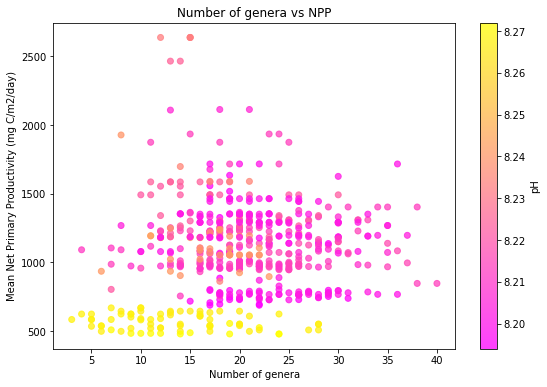

In [12]:
#figure 1
#Set the figure and the axis
fig1, ax1 = plt.subplots(figsize=(9, 6))
#Add in the criteria for your scatter plot
sc1 = ax1.scatter(
    selected_coral_data["Number_of_genera"],
    selected_coral_data["Net_primary_prod"],
    c=selected_coral_data["PH"],
    cmap="spring",
    alpha=0.75
)
#Set the customizations
ax1.set_xlabel("Number of genera")
ax1.set_ylabel("Mean Net Primary Productivity (mg C/m2/day)")
ax1.set_title("Number of genera vs NPP")
cbar1 = fig1.colorbar(sc1, ax=ax1)
cbar1.set_label("pH")


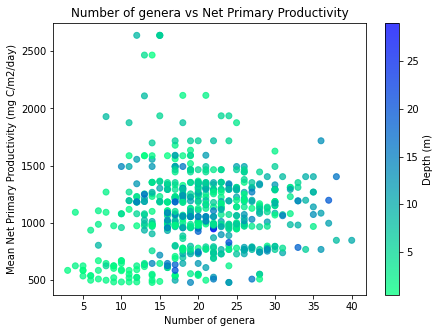

In [18]:
#figure 2
#Set the figure and the axis
fig2, ax2 = plt.subplots(figsize=(7, 5))
#Add in the criteria for your scatter plot
sc2 = ax2.scatter(
    selected_coral_data["Number_of_genera"],
    selected_coral_data["Net_primary_prod"],
    c=selected_coral_data["Depth"],
    cmap="winter_r",
    alpha=0.75
)
#Set the customizations
ax2.set_xlabel("Number of genera")
ax2.set_ylabel("Mean Net Primary Productivity (mg C/m2/day)")
ax2.set_title("Number of genera vs Net Primary Productivity")
cbar2 = fig2.colorbar(sc2, ax=ax2)
cbar2.set_label("Depth (m)")

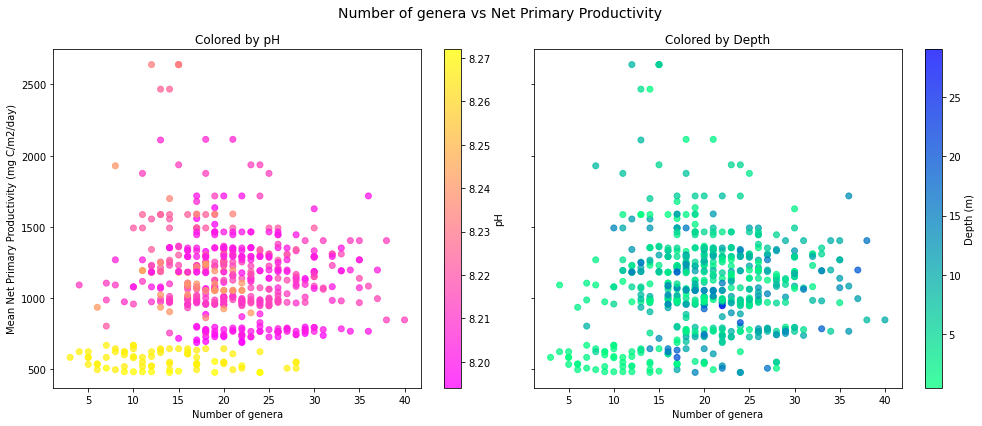

In [25]:
# Create a figure with 1 row and 2 columns of subplots
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# ============================
# Plot 1: Colored by pH
# ============================

# Scatter plot:
# x-axis: Number of coral genera
# y-axis: Net Primary Productivity (NPP)
# color: pH values using the "spring" colormap
sc1 = ax1.scatter(
    selected_coral_data["Number_of_genera"],
    selected_coral_data["Net_primary_prod"],
    c=selected_coral_data["PH"],
    cmap="spring",
    alpha=0.75
)

# Label axes
ax1.set_xlabel("Number of genera")
ax1.set_ylabel("Mean Net Primary Productivity (mg C/m2/day)")

# Title for first subplot
ax1.set_title("Colored by pH")

# Add colorbar for pH values
cbar1 = fig.colorbar(sc1, ax=ax1)
cbar1.set_label("pH")


# ============================
# Plot 2: Colored by Depth
# ============================

# Scatter plot:
# x-axis: Number of coral genera
# y-axis: Net Primary Productivity (NPP)
# color: Depth values using the reversed "winter" colormap
sc2 = ax2.scatter(
    selected_coral_data["Number_of_genera"],
    selected_coral_data["Net_primary_prod"],
    c=selected_coral_data["Depth"],
    cmap="winter_r",
    alpha=0.75
)

# Label x-axis (y-axis shared from ax1)
ax2.set_xlabel("Number of genera")

# Title for second subplot
ax2.set_title("Colored by Depth")

# Add colorbar for depth values
cbar2 = fig.colorbar(sc2, ax=ax2)
cbar2.set_label("Depth (m)")


# ============================
# Final figure formatting
# ============================

# Overall title for the combined figure
fig3.suptitle("Number of genera vs Net Primary Productivity", fontsize=14)

# Automatically adjust spacing to prevent label overlap
fig3.tight_layout()

# Display the figure
plt.show()

In [26]:
#Save Intermediate Data
selected_coral_data.to_csv("intermediate_data/coral_selected.csv", index=False)
#Save our final figure
fig3.savefig("data_viz/Coral_DataAnalysis.png", dpi=300, bbox_inches="tight")